In [1]:
import kagglehub

# Download spotify-tracks-dataset
spotify_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print("Path to dataset files:", spotify_path)

Path to dataset files: C:\Users\shenz\.cache\kagglehub\datasets\maharshipandya\-spotify-tracks-dataset\versions\1


In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns

In [3]:
data_file = spotify_path + "/dataset.csv"
df = pd.read_csv(data_file)
print("Shape:", df.shape)
df.head(10)

Shape: (114000, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [4]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [5]:
df.dropna()
df['explicit'] = df['explicit'].astype(int)
df = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'key', 'time_signature'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  int32  
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   loudness          114000 non-null  float64
 6   mode              114000 non-null  int64  
 7   speechiness       114000 non-null  float64
 8   acousticness      114000 non-null  float64
 9   instrumentalness  114000 non-null  float64
 10  liveness          114000 non-null  float64
 11  valence           114000 non-null  float64
 12  tempo             114000 non-null  float64
dtypes: float64(9), int32(1), int64(3)
memory usage: 10.9 MB


In [7]:
# normalize the data
mean = df.mean()
std = df.std()
df = (df - mean) / std

In [8]:
# keep at least 80% percent of variance
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df)
print("Explained variance by 8 PCs:", pca.explained_variance_ratio_.sum())

Explained variance by 8 PCs: 0.8238611630972636


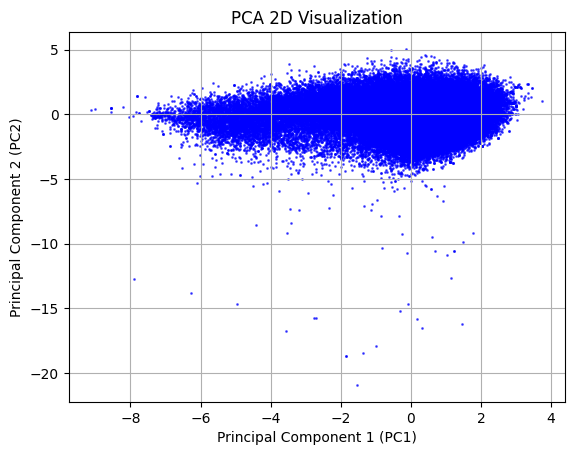

In [57]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1, alpha=0.6, c='blue')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA 2D Visualization')
plt.grid(True)
plt.show()

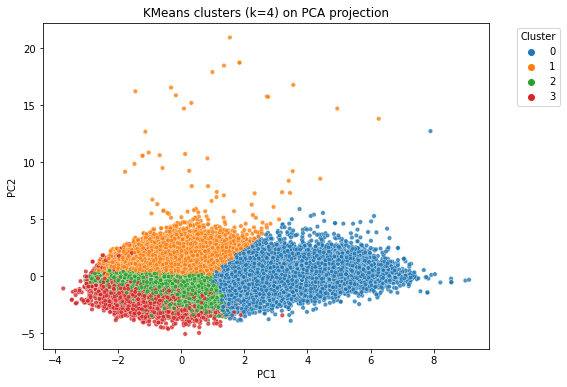

KMeans silhouette score: 0.15509970472512313


In [9]:
# KNN
best_k = 4
kmeans = KMeans(best_k, random_state=42, n_init=20)
k_labels = kmeans.fit_predict(X_pca)

# Visualize on PCA 2D
plt.figure(figsize=(8,6))
palette = sns.color_palette('tab10', 4)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=k_labels, palette=palette, s=20, alpha=0.8, legend='full')
plt.title(f"KMeans clusters (k={best_k}) on PCA projection")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

# silhouette score
print("KMeans silhouette score:", silhouette_score(X_pca, k_labels))

No handles with labels found to put in legend.


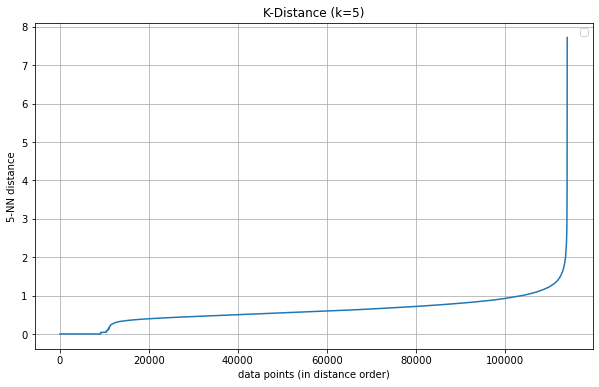

In [10]:
#DBSCAN

from sklearn.neighbors import NearestNeighbors
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_pca)
distances, indices = neighbors.kneighbors(X_pca)

# the kth nearest neighbor
k_distances = distances[:, -1]
k_distances = np.sort(k_distances)

plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.xlabel('data points (in distance order)')
plt.ylabel(f'{k}-NN distance')
plt.title(f'K-Distance (k={k})')
plt.grid(True)
plt.legend()
plt.show()

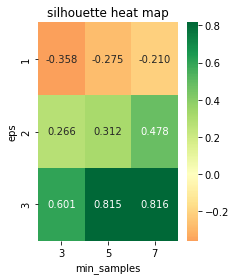

In [16]:
eps_range = [1, 2, 3]
min_samples_range = [3, 5, 7]
best_params = None
best_score = -1
results_summary = []

for eps in eps_range:
  for ms in min_samples_range:
      dbscan = DBSCAN(eps=eps, min_samples=ms)
      labels = dbscan.fit_predict(X_pca)

      n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
      n_noise = list(labels).count(-1)

      if n_clusters >= 2 and n_noise < len(labels) * 0.5:
          mask = labels != -1
          if mask.sum() > 0 and len(set(labels[mask])) > 1:
              score = silhouette_score(X_pca[mask], labels[mask])

              results_summary.append({
                  'eps': eps,
                  'min_samples': ms,
                  'n_clusters': n_clusters,
                  'noise_ratio': n_noise / len(labels),
                  'silhouette': score
              })

              if score > best_score:
                  best_score = score
                  best_params = {'eps': eps, 'min_samples': ms}

plt.subplot(1, 2, 2)
df_results = pd.DataFrame(results_summary)
if len(df_results) > 0:
    pivot = df_results.pivot_table(
        values='silhouette',
        index='eps',
        columns='min_samples'
    )
    sns.heatmap(pivot, annot=True, fmt='.3f', cmap='RdYlGn', center=0)
    plt.title('silhouette heat map')

plt.tight_layout()
plt.show()

In [9]:
dbscan = DBSCAN(eps=2, min_samples=10)
labels = dbscan.fit_predict(X_pca)

print(f"number of cluster: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"noise %: {list(labels).count(-1) / len(labels):.2%}")

number of cluster: 2
noise %: 0.26%


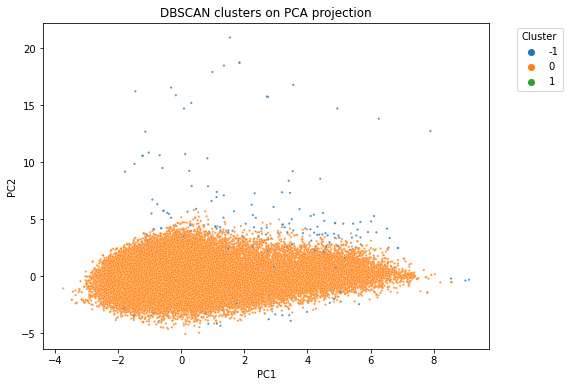

In [10]:
plt.figure(figsize=(8,6))
palette = sns.color_palette('tab10', 3)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette=palette, s=5, alpha=0.8, legend='full')
plt.title(f"DBSCAN clusters on PCA projection")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [19]:
# silhouette score
mask = labels != -1
# print("DBSCAN silhouette score:", silhouette_score(X_pca[mask], labels[mask]))
print("DBSCAN calinski_harabasz_score:", calinski_harabasz_score(X_pca[mask], labels[mask]))
print("DBSCAN davies_bouldin_score:", davies_bouldin_score(X_pca[mask], labels[mask]))

DBSCAN calinski_harabasz_score: 359.1235506312543
DBSCAN davies_bouldin_score: 0.2029428269213351
